# Solar Submersible Mission: Concept, Physics, and Dispatch Plan

**Goal:** Deliver an informational payload into the Sun’s **Deep Convective Zone (CZ)** using a **1‑km‑class submersible vehicle**, aided by sacrificial **pellet swarms** and a **near‑Sun $1\ \mathrm{TW}$ power station** (for priming, timing, manufacturing, diagnostics).

This notebook summarizes the mission concept and performs baseline calculations for: solar layers, key transport concepts, vehicle & trajectory, pellet properties and dispatch rates, and a final descent table.

## Sun Structure (Layers, Thickness, and Processes)


Approximate layered view (outward):
- **Core**: to $\sim 0.25\,R_{\odot}$; nuclear fusion.
- **Radiative Zone**: $\sim 0.25$–$0.70\,R_{\odot}$; radiative transport.
- **Tachocline**: thin shear at $\sim 0.70\,R_{\odot}$; part of the solar dynamo.
- **Convective Zone**: $\sim 0.70$–$1.00\,R_{\odot}$; convective transport.
- **Photosphere** ($\sim 500\ \mathrm{km}$ thick): visible "surface".
- **Chromosphere** ($\sim 2{,}000$–$3{,}000\ \mathrm{km}$): rising temperature.
- **Corona** (extends $\gg 10^6\ \mathrm{km}$): hot, low-density plasma $\to$ solar wind.


### Structure + Magnetic Fields: Sun Layer Diagrams

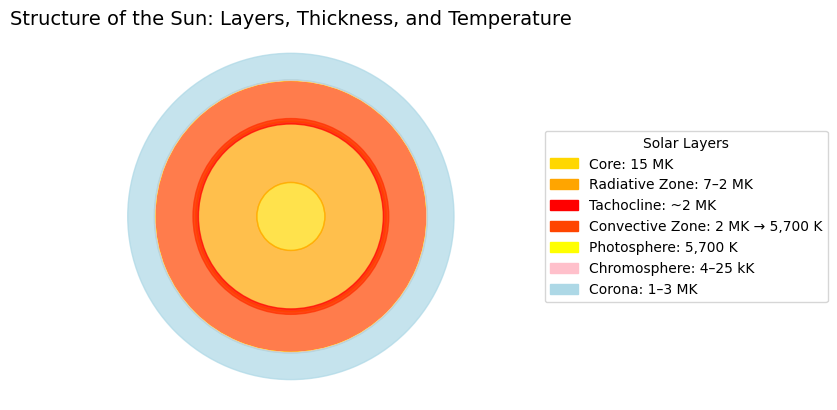

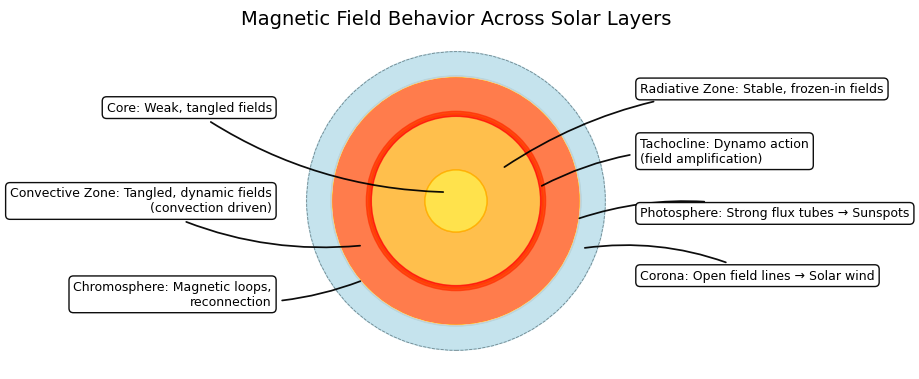

In [1]:
# ---- Structure + Magnetic Fields: Sun Layer Diagrams ----
# Requirements: matplotlib

import math
from typing import Any

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Layer spec: (name, inner radius R_sun, outer radius R_sun, color, temperature label)
layers = [
    ("Core", 0.00, 0.25, "gold", "15 MK"),
    ("Radiative Zone", 0.25, 0.70, "orange", "7–2 MK"),
    ("Tachocline", 0.68, 0.72, "red", "~2 MK"),
    ("Convective Zone", 0.70, 1.00, "orangered", "2 MK → 5,700 K"),
    ("Photosphere", 1.00, 1.001, "yellow", "5,700 K"),
    ("Chromosphere", 1.001, 1.004, "pink", "4–25 kK"),
    ("Corona", 1.004, 1.20, "lightblue", "1–3 MK"),
]

def draw_layers(ax, show_legend=True, title="Structure of the Sun: Layers, Thickness, and Temperature"):
    handles = []
    for name, r_in, r_out, color, temp in layers:
        wedge = mpatches.Wedge((0, 0), r_out, 0, 360, width=r_out - r_in, color=color, alpha=0.7)
        ax.add_patch(wedge)
        handles.append(mpatches.Patch(color=color, label=f"{name}: {temp}"))

    ax.set_xlim(-1.65, 1.65)  # widened to leave space for outer annotations
    ax.set_ylim(-1.35, 1.35)
    ax.set_aspect("equal")
    ax.axis("off")
    ax.set_title(title, fontsize=14)
    if show_legend:
        ax.legend(handles=handles, loc="center left", bbox_to_anchor=(1.05, 0.5), title="Solar Layers")

# Convenience: mid-radius lookup for each layer (for callout anchor points)
layer_mid_r = {name: 0.5*(r_in + r_out) for name, r_in, r_out, *_ in layers}

# --- Figure 1: basic layered cutaway
fig1, ax1 = plt.subplots(figsize=(8, 8))
draw_layers(ax1)
plt.tight_layout()
plt.show()

def polar_to_xy(r: float, deg: float) -> tuple[float, float]:
    rad = math.radians(deg)
    return (r * math.cos(rad), r * math.sin(rad))

# --- Figure 2: magnetic-field annotations arranged outside (legend-like) + callouts
fig2, ax2 = plt.subplots(figsize=(9, 9))
draw_layers(ax2, show_legend=False, title="Magnetic Field Behavior Across Solar Layers")

# Define outer “legend” columns and which layer each label refers to.
# Provide a target angle on the Sun for a nice-looking connector landing spot.
right_col = [
    ("Stable, frozen-in fields", "Radiative Zone", 35),
    ("Dynamo action\n(field amplification)", "Tachocline", 10),
    ("Strong flux tubes → Sunspots", "Photosphere", -8),
    ("Open field lines → Solar wind", "Corona", -20),
]
left_col = [
    ("Weak, tangled fields", "Core", 145),
    ("Tangled, dynamic fields\n(convection driven)", "Convective Zone", -155),
    ("Magnetic loops,\nreconnection", "Chromosphere", 220),
]

# Vertical placement for the legend-like columns (top → bottom)
def spaced_y(n, y_top=0.95, y_bottom=-0.95):
    if n == 1:
        return [0.0]
    return [y_top - i * (y_top - y_bottom) / (n - 1) for i in range(n)]

right_y = spaced_y(len(right_col), y_top=0.90, y_bottom=-0.60)
left_y  = spaced_y(len(left_col),  y_top=0.75, y_bottom=-0.75)

x_right = 1.48
x_left  = -1.48

# Style for all callouts
box_style = dict(boxstyle="round,pad=0.35", fc="white", alpha=0.95)
arrow_style = dict(
    arrowstyle="-",      # change to "->" if you want arrowheads
    lw=1.25,
    shrinkA=4,
    shrinkB=0,
    connectionstyle="arc3,rad=0.15",
    alpha=0.95,
)

# Draw left column
for (text, layer_name, angle_deg), y_text in zip(left_col, left_y):
    r_anchor = layer_mid_r[layer_name]
    x_anchor, y_anchor = polar_to_xy(r_anchor, angle_deg)
    ax2.annotate(
        f"{layer_name}: {text}",
        xy=(x_anchor, y_anchor),
        xytext=(x_left, y_text),
        textcoords="data",
        ha="right",
        va="center",
        fontsize=9,
        bbox=box_style,
        arrowprops=arrow_style,
    )

# Draw right column
for (text, layer_name, angle_deg), y_text in zip(right_col, right_y):
    r_anchor = layer_mid_r[layer_name]
    x_anchor, y_anchor = polar_to_xy(r_anchor, angle_deg)
    ax2.annotate(
        f"{layer_name}: {text}",
        xy=(x_anchor, y_anchor),
        xytext=(x_right, y_text),
        textcoords="data",
        ha="left",
        va="center",
        fontsize=9,
        bbox=box_style,
        arrowprops=arrow_style,
    )

# Optional subtle guides showing the outer radius of the corona (for context)
ax2.add_patch(mpatches.Circle((0, 0), 1.20, fill=False, lw=0.6, ls="--", alpha=0.4))

plt.tight_layout()
plt.show()

# Optional: save figures
# fig1.savefig("sun_layers.png", dpi=220, bbox_inches="tight")
# fig2.savefig("sun_magnetic_fields_callouts_outside.png", dpi=220


## A high-inclination ≈ 85° heliocentric orbit with perihelion inside the solar corona, crossing the Sun’s polar region

## High-Inclination Polar Launch Orbit (≈85°) — Purpose and Rationale

A high-inclination heliocentric orbit ($i \approx 85^\circ$) with perihelion inside the solar corona is used to approach the Sun through its **polar region**. The intent is to reduce environmental extremes during the critical entry sequence and improve controllability of the protective plasma sheath:

- **Lower density and fewer closed magnetic loops (statistically):** Polar coronal holes often feature more open field lines and reduced coronal structure compared to active-region belts, lowering the probability of intersecting dense loop systems and reconnection-prone geometries.
- **Cleaner "line-of-sight" corridor for pre-seeded material:** A polar approach provides a simpler, more repeatable corridor for deploying and maintaining a forward cloud of ablated pellets ahead of the vehicle.
- **Operational geometry:** A near-polar path helps decouple the descent corridor from equatorial activity belts and enables consistent alignment for remote power beaming/priming from an external station.

This orbit is therefore treated as a *launching corridor* into a comparatively "quiet" entry region, rather than a claim that polar conditions are uniformly benign.


In [ ]:
def plot_solar_orbit_plotly(
    R_sun: float = 1.0,
    q: float = None,                # perihelion distance; defaults to 1.05 * R_sun if None
    e: float = 0.6,                 # eccentricity (elliptic: 0 <= e < 1)
    i_deg: float = 85.0,            # inclination to solar equator (deg)
    raan_deg: float = 0.0,          # RAAN Ω (deg)
    argp_deg: float = 90.0,         # argument of perihelion ω (deg)
    N: int = 1500,                  # number of samples
    show: bool = True,              # call fig.show()
    save_html: str | None = None,   # path to save as HTML
    margin_frac: float = 0.15,      # extra space around the data cube
    orthographic: bool = False      # toggle orthographic projection
):
    import numpy as np
    import plotly.graph_objects as go

    # -------- Validation & defaults --------
    q = 1.05 * R_sun if q is None else float(q)
    if not (q > 0):
        raise ValueError("q must be > 0.")
    if not (0 <= e < 1):
        raise ValueError("Elliptic only: require 0 <= e < 1.")
    if N < 3:
        raise ValueError("N must be >= 3.")
    e = min(max(float(e), 0.0), 1.0 - 1e-12)
    EPS = 1e-15

    # -------- Helpers --------
    def R3(th):
        c, s = np.cos(th), np.sin(th)
        return np.array([[ c, -s, 0.0],
                         [ s,  c, 0.0],
                         [0.0, 0.0, 1.0]], dtype=np.float64)

    def R1(th):
        c, s = np.cos(th), np.sin(th)
        return np.array([[1.0, 0.0, 0.0],
                         [0.0,  c, -s],
                         [0.0,  s,  c]], dtype=np.float64)

    # -------- Orbital geometry --------
    i    = np.deg2rad(float(i_deg))
    raan = np.deg2rad(float(raan_deg))
    argp = np.deg2rad(float(argp_deg))

    nu = np.linspace(0.0, 2.0*np.pi, int(N), dtype=np.float64, endpoint=False)
    den = 1.0 + e * np.cos(nu)
    bad = np.isclose(den, 0.0, atol=EPS)
    if np.any(bad):
        nu[bad] += 1e-9
        den = 1.0 + e * np.cos(nu)
    r = q * (1.0 + e) / (den + EPS)

    xp = r * np.cos(nu)
    yp = r * np.sin(nu)
    zp = np.zeros_like(xp)

    Q = R3(raan) @ R1(i) @ R3(argp)
    pqw = np.vstack((xp, yp, zp))
    xyz = np.einsum('ij,jk->ik', Q, pqw, optimize=True)
    x, y, z = xyz[0], xyz[1], xyz[2]

    xq, yq, zq = (Q @ np.array([q, 0.0, 0.0], dtype=np.float64))

    # -------- Sun + equatorial plane --------
    phi   = np.linspace(0, np.pi, 80, dtype=np.float64)
    theta = np.linspace(0, 2*np.pi, 160, dtype=np.float64)
    Phi, Theta = np.meshgrid(phi, theta, indexing="xy")
    Xs = R_sun * np.sin(Phi) * np.cos(Theta)
    Ys = R_sun * np.sin(Phi) * np.sin(Theta)
    Zs = R_sun * np.cos(Phi)

    # Use a unified cube range so scales are identical on X, Y, Z
    max_abs = np.nanmax([np.abs(x).max(), np.abs(y).max(), np.abs(z).max(), R_sun])
    Rlim = (1.0 + margin_frac) * max_abs
    ax_range = [-Rlim, Rlim]

    # Make plane big enough to cover the cube
    g = np.linspace(-Rlim, Rlim, 30, dtype=np.float64)
    GX, GY = np.meshgrid(g, g, indexing="xy")
    GZ = np.zeros_like(GX)

    # -------- Traces --------
    sun = go.Surface(x=Xs, y=Ys, z=Zs, showscale=False, opacity=0.4, hoverinfo="skip", name="Sun")
    plane = go.Surface(x=GX, y=GY, z=GZ, showscale=False, opacity=0.15, hoverinfo="skip", name="Solar equatorial plane")
    orbit = go.Scatter3d(x=x, y=y, z=z, mode="lines", line=dict(width=4),
                         name=f"Orbit: i={i_deg:.1f}°, ω={argp_deg:.1f}°, e={e:.3f}")
    peri  = go.Scatter3d(x=[xq], y=[yq], z=[zq], mode="markers+text", marker=dict(size=6),
                         text=["Perihelion<br>(~over +pole)"], textposition="top left", name="Perihelion")
    spin  = go.Scatter3d(x=[0,0], y=[0,0], z=[-2.0*R_sun, 2.0*R_sun], mode="lines",
                         line=dict(width=4, dash="dash"), name="Solar spin axis (+Z)")

    fig = go.Figure(data=[plane, sun, orbit, peri, spin])

    # -------- Equal scaling + optional orthographic --------
    fig.update_layout(
        title="High-Inclination (~85°) Solar Orbit with Equal Axes",
        scene=dict(
            xaxis_title="X (solar-equatorial)",
            yaxis_title="Y (solar-equatorial)",
            zaxis_title="Z (solar-equatorial)",
            # Force identical units on X, Y, Z:
            aspectmode="manual",
            aspectratio=dict(x=1, y=1, z=1),
            xaxis=dict(range=ax_range, zeroline=False),
            yaxis=dict(range=ax_range, zeroline=False),
            zaxis=dict(range=ax_range, zeroline=False),
            camera=dict(
                projection=dict(type="orthographic" if orthographic else "perspective")
            )
        ),
        legend=dict(x=0.02, y=0.98)
    )

    if save_html:
        fig.write_html(save_html, include_plotlyjs="cdn")
    if show:
        fig.show()
    return fig


fig = plot_solar_orbit_plotly(orthographic=True, show=False)
fig.update_layout(width=1100, height=800)  # pick your size
fig.show()


## Thomson Optical Depth and Cross-Section

- **Thomson cross-section**:
  $\sigma_T = 6.65 \times 10^{-29}\,\mathrm{m^2}$,

  where:
   - $\sigma_T$ is the Thomson scattering cross-section, i.e. the effective area for **elastic scattering of photons with energy $h\nu \ll m_e c^2$**, such that the electron recoil is non-relativistic.

  Here:
   - $h$ is Planck’s constant ($h \approx 6.626 \times 10^{-34}\,\mathrm{J\,s}$),
   - $\nu$ (Greek letter *nu*, often written as “v”) is the photon frequency, so that the photon energy is $E_\gamma = h\nu$, $m_e$ is the electron rest mass, and $c$ is the speed of light in vacuum.


- **Optical depth**:
  $\tau = n_e\,\sigma_T\,L$,

  where:
    - $\tau$ is the dimensionless optical depth,
    - $n_e$ is the free-electron number density $[\mathrm{m^{-3}}]$,
    - $\sigma_T$ is the Thomson cross-section $[\mathrm{m^2}]$, and
    - $L$ is the physical path length through the medium $[\mathrm{m}]$.

  This form assumes a homogeneous medium with constant $n_e$ along $L$.

- **Physical meaning of optical depth**:

  $\tau \ll 1$: optically thin (scattering probability $\ll 1$);

  $\tau \approx 1$: marginally optically thick (of order one scattering per photon);

  $\tau \gg 1$: optically thick (multiple scatterings, diffusive transport).

- **Required electron density**:
  $n_e = \tau/(\sigma_T\,L)$,

  where:
   - $n_e$ is the electron number density required to obtain a target optical depth $\tau$ over a path length $L$ when Thomson scattering dominates.


## Sheath Mass for $\tau \approx 1$ (100 km Standoff) at 1‑km Scale

In [3]:
import math, pandas as pd

sigma_T = 6.65e-29
L = 100_000.0
tau = 1.0
rv = 500.0  # radius in meters for the 1-km object
A = math.pi * rv ** 2
n_e = tau / (sigma_T * L)
m_ion = 56.0 * 1.6605e-27
Z = 26.0
m_per_e = m_ion / Z
rho = n_e * m_per_e
V = A * L
M_100 = rho * V
pd.DataFrame([
    ("n_e (m^-3)", n_e),
    ("mass per electron (kg/e-)", m_per_e),
    ("plasma density (kg/m^3)", rho),
    ("A (m^2)", A),
    ("L (m)", L),
    ("Mass for tau≈1 per meter (kg/m)", M_100 / L),
    ("Mass for tau≈1 over 100 km (kg)", M_100),
],
    columns=["Parameter", "Value"]
)

,Parameter,Value
0,n_e (m^-3),1.503759e+23
1,mass per electron (kg/e-),3.576462e-27
2,plasma density (kg/m^3),5.378138e-04
3,A (m^2),7.853982e+05
4,L (m),1.000000e+05
5,Mass for tau≈1 per meter (kg/m),4.223979e+02
6,Mass for tau≈1 over 100 km (kg),4.223979e+07


## Pellet Porosity Definition

Porosity $\phi$ is the **void fraction**.

$\rho_{\mathrm{bulk}}=(1-\phi)\rho_{\mathrm{solid}}$

For a sphere:

$$
\begin{aligned}
V &= \frac{\pi}{6}\,d^3 \\
A_{\mathrm{proj}} &= \pi\left(\frac{d}{2}\right)^2 \\
m &= \rho_{\mathrm{bulk}}\,V \\
P_{\mathrm{abs}} &= \alpha\,F\,A_{\mathrm{proj}} \\
t &\approx \frac{m\,h_{\mathrm{vap}}}{P_{\mathrm{abs}}}
\end{aligned}
$$



## Spherical Pellets: Power, Mass, Vaporization Time

In [2]:
import math
from typing import Dict, List, Tuple

import pandas as pd

# --------------------------------------------------------------------------------------
# Pellet vaporization-time back-of-the-envelope model (radiative heating, spherical pellets)
#
# For each pellet (sphere of diameter d):
#   V        = (pi/6) d^3
#   A_proj   = pi (d/2)^2
#   rho_bulk = (1 - phi) * rho_solid
#   m        = rho_bulk * V
#   P_abs    = alpha * F * A_proj
#   t_vap    = (m * h_vap) / P_abs
#
# Notes / Clarifications:
# - This is an order-of-magnitude estimate. It assumes:
#     * constant external flux F (no geometric/optical variation),
#     * constant absorptivity alpha (no spectral dependence / no temperature dependence),
#     * energy-limited ablation (all absorbed power goes into phase change + ionization),
#     * no explicit reradiation term and no conductive/convective loss terms,
#     * pellet remains effectively spherical for the purpose of A_proj.
# - The "materials" mapping stores an *effective solid-equivalent density* rho_solid and an
#   *effective enthalpy per kg* h_vap for vaporization/ionization.
# - For Ni–Fe (30/70), rho_solid is treated as a mixture-effective density.
# - For Al–C composite, rho_solid and h_vap represent an effective homogeneous composite
#   (e.g., an Al shell + Al/C granular core). A physically plausible composition is
#   ~70% Al / 30% C by mass, which yields h_vap ~ 3e7 J/kg (order-of-magnitude).
# - Porosity phi is applied consistently via rho_bulk = (1-phi)*rho_solid.
# --------------------------------------------------------------------------------------

# Solar radiative flux scale used for the estimate (W/m^2)
F: float = 6e7

# Effective absorptivity (dimensionless)
alpha: float = 0.8

# Pellet porosity: void fraction in [0, 1). rho_bulk = (1-phi)*rho_solid
phi: float = 0.3

# Type alias for material property tuple: (rho_solid [kg/m^3], h_vap [J/kg])
MaterialProps = Tuple[float, float]

# Effective material properties:
# - rho_solid: solid-equivalent density BEFORE porosity adjustment
# - h_vap: effective enthalpy per kg to heat/melt/vaporize and (optionally) ionize
materials: Dict[str, MaterialProps] = {
    # Ni–Fe alloy (30% Ni / 70% Fe by mass; treated as one effective phase)
    # rho_solid here is a reasonable mixture-effective value.
    "Ni–Fe (30/70)": (8250.0, 6.3e6),

    # Al–C composite: modeled as an effective homogeneous composite.
    # Example physical realization: Al shell + Al/C microgranular core.
    # The chosen rho_solid is an effective solid-equivalent density (before porosity),
    # and h_vap is an effective energy-per-mass budget (often larger than metals due to C).
    "Al–C (70/30)": (2500.0, 3.06e7),
}

# Candidate pellet diameters to tabulate (m)
diameters: List[float] = [0.1, 0.3, 1.0, 3.0, 10.0]

rows: List[dict] = []
for name, (rho_solid, h_vap) in materials.items():
    # Bulk density includes porosity
    rho_bulk: float = (1.0 - phi) * rho_solid

    for d in diameters:
        # Geometry
        V: float = (math.pi / 6.0) * d**3                 # m^3
        Aproj: float = math.pi * (d / 2.0) ** 2           # m^2

        # Mass
        m: float = rho_bulk * V                           # kg

        # Absorbed radiative power (projected-area model)
        Pabs: float = alpha * F * Aproj                   # W

        # Energy-limited vaporization time
        t: float = (m * h_vap) / Pabs                     # s

        rows.append(
            {
                "Material": name,
                "φ": phi,
                "d (m)": d,
                "ρ_solid (kg/m^3)": rho_solid,
                "ρ_bulk (kg/m^3)": rho_bulk,
                "h_vap (J/kg)": h_vap,
                "m (kg)": m,
                "P_abs (MW)": Pabs / 1e6,
                "t_vap (s)": t,
                "t_vap (min)": t / 60.0,
            }
        )

df_pellets = pd.DataFrame(rows)
df_pellets

,Material,φ,d (m),ρ_solid (kg/m^3),ρ_bulk (kg/m^3),h_vap (J/kg),m (kg),P_abs (MW),t_vap (s),t_vap (min)
0,Ni–Fe (30/70),0.3,0.1,8250.0,5775.0,6300000.0,3.023783e+00,0.376991,50.53125,0.842187
1,Ni–Fe (30/70),0.3,0.3,8250.0,5775.0,6300000.0,8.164214e+01,3.392920,151.59375,2.526562
2,Ni–Fe (30/70),0.3,1.0,8250.0,5775.0,6300000.0,3.023783e+03,37.699112,505.31250,8.421875
3,Ni–Fe (30/70),0.3,3.0,8250.0,5775.0,6300000.0,8.164214e+04,339.292007,1515.93750,25.265625
4,Ni–Fe (30/70),0.3,10.0,8250.0,5775.0,6300000.0,3.023783e+06,3769.911184,5053.12500,84.218750
5,Al–C (70/30),0.3,0.1,2500.0,1750.0,30600000.0,9.162979e-01,0.376991,74.37500,1.239583
6,Al–C (70/30),0.3,0.3,2500.0,1750.0,30600000.0,2.474004e+01,3.392920,223.12500,3.718750
7,Al–C (70/30),0.3,1.0,2500.0,1750.0,30600000.0,9.162979e+02,37.699112,743.75000,12.395833
8,Al–C (70/30),0.3,3.0,2500.0,1750.0,30600000.0,2.474004e+04,339.292007,2231.25000,37.187500
9,Al–C (70/30),0.3,10.0,2500.0,1750.0,30600000.0,9.162979e+05,3769.911184,7437.50000,123.958333


In [5]:
import math
import pandas as pd

phi = 0.3
rho_NiFe = 8250.0 * (1 - phi)
rho_AlC  = 2500.0 * (1 - phi)

def d_from_m(m: float, rho_b: float) -> float:
    return (6 * m / (math.pi * rho_b)) ** (1 / 3)

# Inputs
m_ni_fe = 1_000_000.0   # 1 kt
m_al_c  = 10_000.0      # 10 t

# Diameters at φ = 0.3
d_ni_fe = d_from_m(m_ni_fe, rho_NiFe)
d_al_c  = d_from_m(m_al_c,  rho_AlC)

df = pd.DataFrame(
    {
        "mass (kg)": [m_ni_fe, m_al_c],
        "ρ_bulk (kg/m^3)": [rho_NiFe, rho_AlC],
        "diameter at φ=0.3 (m)": [d_ni_fe, d_al_c],
    },
    index=["Ni–Fe", "Al–C"]
)

df


,mass (kg),ρ_bulk (kg/m^3),diameter at φ=0.3 (m)
Ni–Fe,1000000.0,5775.0,6.915387
Al–C,10000.0,1750.0,2.218134


**Chosen sizes ($\phi=0.3$):**

* Ni–Fe (30/70) baseline pellets: **1 kt** with computed diameter above
* Al–C reactive pellets: **10 t** with computed diameter above.

## Descent Plan by Region at $v=300\ \mathrm{\frac{m}{s}}$ and Dispatch Schedule

In [6]:
import math, pandas as pd

regions = [
    ("Corona", 10_000, 0.3, "1e6–3e6"),
    ("Chromosphere", 3_000, 1.0, "4e3–2.5e4"),
    ("Photosphere", 500, 3.0, "5.7e3"),
    ("Upper CZ", 5_000, 2.0, "2e6→6e3"),
    ("Deep CZ", 40_000, 1.5, "2e6→1e6")
]
sigma_T = 6.65e-29
Lref = 100_000.0
rv = 500.0
A = math.pi * rv ** 2
n_e = 1.0 / (sigma_T * Lref)
m_ion = 56.0 * 1.6605e-27
Z = 26.0
m_per_e = m_ion / Z
rho = n_e * m_per_e
M100 = rho * A * Lref
mperm = M100 / Lref
v = 300.0
rows = []
totm = totL = tott = 0.0
for name, Dkm, tau, T in regions:
    Dm = Dkm * 1000.0
    dur = Dm / v / 60.0
    mneed = mperm * tau * Dm
    rows.append({
        "Region": name,
        "Depth (km)": Dkm,
        "Temperature range (K)": T,
        "Tau factor": tau,
        "Duration (min)": dur,
        "Mass needed (kg)": mneed,
        "Baseline mass flow (kg/s)": mperm * tau * v
    })
    totm += mneed
    totL += Dm
    tott += Dm / v

df_layers = pd.DataFrame(rows)
df_layers_total = pd.DataFrame([{
    "Region": "TOTAL",
    "Depth (km)": totL / 1000.0,
    "Temperature range (K)": "-",
    "Tau factor": "-",
    "Duration (min)": tott / 60.0,
    "Mass needed (kg)": totm,
    "Baseline mass flow (kg/s)": "-"
}])

df_layers_all = pd.concat([df_layers, df_layers_total], ignore_index=True)
df_layers_all

,Region,Depth (km),Temperature range (K),Tau factor,Duration (min),Mass needed (kg),Baseline mass flow (kg/s)
0,Corona,10000.0,1e6–3e6,0.3,555.555556,1.267194e+09,38015.814908
1,Chromosphere,3000.0,4e3–2.5e4,1.0,166.666667,1.267194e+09,126719.383027
2,Photosphere,500.0,5.7e3,3.0,27.777778,6.335969e+08,380158.149082
3,Upper CZ,5000.0,2e6→6e3,2.0,277.777778,4.223979e+09,253438.766054
4,Deep CZ,40000.0,2e6→1e6,1.5,2222.222222,2.534388e+10,190079.074541
5,TOTAL,58500.0,-,-,3250.000000,3.273584e+10,-


### Pellet Dispatch (Ni–Fe 1 kt baseline; Al–C 10 t reactive)

#### Note:
Reactive Δτ is the additional (temporary) increase in Thomson optical depth that the vehicle deliberately creates on top of the baseline shielding by firing reactive pellets (the Al–C, 10-ton class pellets).

In [7]:
import pandas as pd, math

regions = [
    ("Corona", 10_000, 0.3, "1e6–3e6"),
    ("Chromosphere", 3_000, 1.0, "4e3–2.5e4"),
    ("Photosphere", 500, 3.0, "5.7e3"),
    ("Upper CZ", 5_000, 2.0, "2e6→6e3"),
    ("Deep CZ", 40_000, 1.5, "2e6–1e6")
]

sigma_T = 6.65e-29
Lref = 100_000.0
rv = 500.0
A = math.pi * rv ** 2
n_e = 1.0 / (sigma_T * Lref)
m_ion = 56.0 * 1.6605e-27
Z = 26.0
m_per_e = m_ion / Z
rho = n_e * m_per_e
M100 = rho * A * Lref
mperm = M100 / Lref
v = 300.0
mdot_tau1 = mperm * v
burst = {
    "Corona": (0.25, 20),
    "Chromosphere": (0.5, 30),
    "Photosphere": (1.0, None),
    "Upper CZ": (0.5, 60),
    "Deep CZ": (0.25, 50)
}
rows = []
NiFeTot = AlCTot = 0.0
for name, Dkm, tau, T in regions:
    Dm = Dkm * 1000.0
    dur = (Dm / v) / 60.0
    mdot = mperm * tau * v
    rate_NiFe_min = (mdot / 1e6) * 60.0
    NiFeTot_region = rate_NiFe_min * dur
    dTau, win = burst[name]
    win = (dur if win is None else win)
    rate_AlC_min = (dTau * mdot_tau1 / 1e4) * 60.0
    AlCTot_region = rate_AlC_min * win
    NiFeTot += NiFeTot_region
    AlCTot += AlCTot_region
    rows.append({
        "Region": name,
        "Depth (km)": Dkm,
        "Temperature range (K)": T,
        "Duration (min)": round(dur, 2),
        "Baseline Ni–Fe rate (1 kt/min)": round(rate_NiFe_min, 2),
        "Baseline Ni–Fe total (pellets)": round(NiFeTot_region, 0),
        "Reactive Δτ": dTau,
        "Reactive window (min)": win,
        "Al–C rate (10 t/min)": round(rate_AlC_min, 0),
        "Al–C total (pellets)": round(AlCTot_region, 0)
    })

rows.append({
    "Region": "TOTAL",
    "Depth (km)": sum(d for _, d, _, _ in regions),
    "Temperature range (K)": "-",
    "Duration (min)": round(sum((d * 1000.0 / v) / 60.0 for _, d, _, _ in regions), 2),
    "Baseline Ni–Fe rate (1 kt/min)": "-",
    "Baseline Ni–Fe total (pellets)": round(NiFeTot, 0),
    "Reactive Δτ": "-",
    "Reactive window (min)": "-",
    "Al–C rate (10 t/min)": "-",
    "Al–C total (pellets)": round(AlCTot, 0)
})
df_dispatch = pd.DataFrame(rows)
df_dispatch

,Region,Depth (km),Temperature range (K),Duration (min),Baseline Ni–Fe rate (1 kt/min),Baseline Ni–Fe total (pellets),Reactive Δτ,Reactive window (min),Al–C rate (10 t/min),Al–C total (pellets)
0,Corona,10000,1e6–3e6,555.56,2.28,1267.0,0.25,20,190.0,3802.0
1,Chromosphere,3000,4e3–2.5e4,166.67,7.6,1267.0,0.5,30,380.0,11405.0
2,Photosphere,500,5.7e3,27.78,22.81,634.0,1.0,27.777778,760.0,21120.0
3,Upper CZ,5000,2e6→6e3,277.78,15.21,4224.0,0.5,60,380.0,22809.0
4,Deep CZ,40000,2e6–1e6,2222.22,11.4,25344.0,0.25,50,190.0,9504.0
5,TOTAL,58500,-,3250.00,-,32736.0,-,-,-,68640.0


## Final Descent Table (Thickness, Duration, Pellets)

In [8]:
import pandas as pd
layers_view=df_layers_all[["Region","Depth (km)","Temperature range (K)","Duration (min)","Mass needed (kg)"]].copy()
dispatch_view=df_dispatch[[
    "Region","Duration (min)",
    "Baseline Ni–Fe rate (1 kt/min)",
    "Baseline Ni–Fe total (pellets)",
    "Reactive Δτ",
    "Reactive window (min)",
    "Al–C rate (10 t/min)",
    "Al–C total (pellets)"
]].copy()
final=pd.merge(layers_view.drop(columns=["Duration (min)"]), dispatch_view, on="Region", how="left")
final=final[
    [
        "Region",
        "Depth (km)",
        "Temperature range (K)",
        "Duration (min)",
        "Mass needed (kg)",
        "Baseline Ni–Fe rate (1 kt/min)",
        "Baseline Ni–Fe total (pellets)",
        "Reactive Δτ",
        "Reactive window (min)",
        "Al–C rate (10 t/min)",
        "Al–C total (pellets)"
     ]
]
final

,Region,Depth (km),Temperature range (K),Duration (min),Mass needed (kg),Baseline Ni–Fe rate (1 kt/min),Baseline Ni–Fe total (pellets),Reactive Δτ,Reactive window (min),Al–C rate (10 t/min),Al–C total (pellets)
0,Corona,10000.0,1e6–3e6,555.56,1.267194e+09,2.28,1267.0,0.25,20,190.0,3802.0
1,Chromosphere,3000.0,4e3–2.5e4,166.67,1.267194e+09,7.6,1267.0,0.5,30,380.0,11405.0
2,Photosphere,500.0,5.7e3,27.78,6.335969e+08,22.81,634.0,1.0,27.777778,760.0,21120.0
3,Upper CZ,5000.0,2e6→6e3,277.78,4.223979e+09,15.21,4224.0,0.5,60,380.0,22809.0
4,Deep CZ,40000.0,2e6→1e6,2222.22,2.534388e+10,11.4,25344.0,0.25,50,190.0,9504.0
5,TOTAL,58500.0,-,3250.00,3.273584e+10,-,32736.0,-,-,-,68640.0


## Descent Concept: Phase-by-Phase Sequence (with Pellet Dispatch and Timing)

### Phase 0 — Establish the $1\,\mathrm{TW}$ Near-Sun Power Plant (Pre-seed + Priming)
**Objective:** Create an initial forward plasma/opacity corridor and enable timed priming of pellets.

- Project constructs: 1 TW Power Plant, and the shielded submersible are separating above the Corona at T-6 hours. At the same time, 3000 **Ni–Fe (30/70) 1 kt pellets** are jettisoned on a ballistic trajectory ahead of the shielded submersible.
- The $1\,\mathrm{TW}$ power plant is slightly accelerating and coasts to a higher orbit.
- First pellets arrive at T-3 hours, and the Power Plant allows them to sink deeper into the Chromosphere before melting them with lazers. It takes about a second for the 1TW lazer to melt a 1 kt pellet.
- Last pellets arrive a couple of minutes ahead of the submersible and their liquification completes the forward sheath.

---

### Phase 1 — Coronal Entry with Reusable Sliding Shield
**Objective:** Survive coronal crossing with a dedicated shield, while preserving the main vehicle’s internal systems for deeper layers.

- The Solar Submersible is protected by a **reusable high-area shield** that is designed to withstand the harsh radiation and temperatures of up to $3 \times 10^6 K$.
- The shield takes the brunt of early radiative/particle exposure while the submersible remains in a controlled thermal state.
- **At the bottom of the coronal segment**, the submersible releases the shield, which then transitions to a rendezvous trajectory:
  - The shield circularizes/adjusts into the power-plant’s higher orbit.
  - It **docks** with the power plant and then boosts to a **parking orbit**.

---

### Phase 2 — Chromosphere Transit (Sheath Formation and Stabilization)
**Objective:** Transition from shield-dominated protection to a pellet-fed, magnetically shaped plasma sheath.

- The vehicle relies on forward-deployed and shipboard pellets to sustain a sheath with an engineering target optical thickness.
- **Baseline Ni–Fe** maintains the bulk column mass; **reactive Al–C** is used to temporarily thicken the sheath when thinning is detected.

**Chromosphere segment parameters:**
- Duration: $\approx 166.67\ \mathrm{min}$ (3,000 km at $300\ \mathrm{\frac{m}{s}}$)
- Temperature range (K): $4 \times 10^3 – 2.5 \times 10^4$
- Baseline Ni–Fe dispatch: $\approx 7.60\ \mathrm{pellets/min}$ (1 kt)
- Total Ni–Fe in phase: $\approx 1{,}266$ pellets

Reactive thickening (burst plan):
- Al–C (10 t): $\Delta\tau=0.5$ for 30 min → $\approx 380\ \mathrm{pellets/min}$ → $\approx 11{,}394$ pellets

---

### Phase 3 — Photosphere Crossing (Highest-Risk Window; Maximum Reactivity)
**Objective:** Cross the photosphere quickly with strong reactive margin and tight feedback control.

- This is the most demanding near-surface segment. The concept relies on:
  - Higher baseline mass flow (Ni–Fe) and
  - Continuous reactive Al–C thickening (per the burst plan) to compensate for mixing, sheath instability, and abrupt environmental changes.

**Photosphere segment parameters:**
- Duration: $\approx 27.78\ \mathrm{min}$ (500 km at $300\ \mathrm{\frac{m}{s}}$)
- Temperature range (K): $5.7 \times 10^3$
- Baseline Ni–Fe dispatch: $\approx 22.79\ \mathrm{pellets/min}$ (1 kt)
- Total Ni–Fe in phase: $\approx 633$ pellets

Reactive thickening (burst plan):
- Al–C (10 t): $\Delta\tau=1.0$ for full 27.78 min → $\approx 760\ \mathrm{pellets/min}$ → $\approx 21{,}100$ pellets

---

### Phase 4 — Upper Convective Zone (Entry and Early Descent)
**Objective:** Maintain sheath stability under stronger convective dynamics and increasing mixing.

- Continue sustained Ni–Fe feed with near constant reactive Al–C thickening to stabilize the sheath after perturbations.
- Short mission lifetime allows rapid descent to reduce cumulative exposure to instability.

**Upper CZ segment parameters:**
- Duration: $\approx 277.78\ \mathrm{min}$ (5,000 km at $300\ \mathrm{\frac{m}{s}}$)
- Temperature range (K): $6 \times 10^3 - 2 \times 10^6$
- Baseline Ni–Fe dispatch: $\approx 15.19\ \mathrm{pellets/min}$ (1 kt)
- Total Ni–Fe in phase: $\approx 4{,}220$ pellets

Reactive thickening (burst plan):
- Al–C (10 t): $\Delta\tau=0.5$ for 60 min → $\approx 380\ \mathrm{pellets/min}$ → $\approx 22{,}788$ pellets

---

### Phase 5 — Deep Convective Zone (Main Mission Leg)
**Objective:** Continue the dive until the environment externalities, such as temperature, magnetic field or sheath instability reduce the guaranteed mission lifetime to two hours; at that time initiate the informational payload release.

- Maintain a steady baseline Ni–Fe feed to sustain the sheath on average.
- Use Al–C bursts as “sheath resets” to recover margin after reconnection/mixing events.

**Deep CZ segment parameters:**
- Duration: $\approx 2{,}222.22\ \mathrm{min}$ (40,000 km at $300\ \mathrm{\frac{m}{s}}$)
- Temperature range (K): $2 \times 10^6 \rightarrow 1 \times 10^6$
- Baseline Ni–Fe dispatch: $\approx 11.39\ \mathrm{pellets/min}$ (1 kt)
- Total Ni–Fe in phase: $\approx 25{,}320$ pellets

Reactive thickening (burst plan):
- Al–C (10 t): $\Delta\tau=0.25 \approx 190\ \mathrm{pellets/min}$ → $\approx 9{,}495$ pellets

**Total descent time (all phases):** $\approx 3{,}250\ \mathrm{min} \approx 54.17\ \mathrm{h}$ (at $300\ \mathrm{\frac{m}{s}}$)
**Total baseline Ni–Fe (1 kt) pellets:** $\approx 32{,}705$
**Total reactive Al–C (10 t) pellets (burst plan):** $\approx 68{,}575$


## Payload and its release

## Abbreviations
- **MHD** — magnetohydrodynamics (conducting fluid/plasma coupled to magnetic fields)
- **EM** — electromagnetic
- **CZ** — convective zone
- **AW** — Alfv\'en wave
- **FMAW** — fast magnetoacoustic wave
- **ECC** — error-correcting code
- **SNR** — signal-to-noise ratio

---

## Alfv\'en Burst (AW): Short Physical Description
An **Alfv\'en wave** is a transverse MHD disturbance that propagates primarily **along magnetic field lines**, with magnetic tension as the restoring force. Its characteristic speed is the **Alfv\'en speed**:

$ v_A = \dfrac{B}{\sqrt{\mu_0 \rho}} $,
where $B$ is magnetic field strength and $\rho$ is plasma mass density.

An **Alfv\'en burst** in this context is a **time-limited packet** of AW energy injected into the local field/plasma system, potentially accompanied by a controlled compressive component (e.g., a weak FMAW) to improve coupling into observable photospheric signatures.

---

## Payload Delivery and Release Mechanism (Remote-Detectable Imprint Target)
### Concept: Coil-Driven, Mode-Coded MHD Injection
The payload is not a physical capsule but a **structured MHD excitation** designed to produce a remotely detectable signature (e.g., a transient photospheric intensity/velocity anomaly or a sunspot-like perturbation). The submersible acts as a high-power MHD transmitter at the terminal stage of descent.

**Hardware mechanism (terminal phases):**
- **Segmented drive coils** (phased-array geometry) are deployed outward from the submersible during the final phase to increase the effective antenna aperture and improve coupling to the surrounding sheath plasma.
- A **high-current pulsed-power stage** drives the coil segments with controlled phase offsets to synthesize azimuthal mode numbers $m$ (e.g., $m=0,1,2,3$) and to modulate frequency components $f_i$.
- The **sheath plasma** becomes the radiating/launching medium: driven currents create $\delta B_\perp(t,\theta)$ perturbations that launch AW-like packets along the ambient and sheath-structured magnetic field.

**Encoding approach (for detectability):**
- Use a small alphabet of robust, separable channels: $(f_i, m, \mathrm{pol})$, where $\mathrm{pol}$ is polarization/helicity.
- Include a strong **preamble** (multi-tone comb) to maximize SNR and increase the chance of producing a recognizable spectral/temporal footprint.
- Optionally include a **controlled compressive “pilot” component** (weak FMAW admixture) to improve conversion into intensity/velocity signals observable in the photosphere (at the cost of faster dissipation locally).

### Release technique (duration and sequencing)

- The Alfvén burst duration is expected to be **minutes to $\sim 1$ hour**.
- During this window, rapid relative motion changes:
  - the local sheath geometry,
  - the effective antenna pattern of the segmented drive coils,
  - the coupling efficiency into preferred magnetic modes.

**Recommended operational mode:**
- Reduce descent speed to $50 \mathrm{\frac{m}{s}}$,
- Maintain quasi-stationary conditions **relative to the local plasma frame** for the duration of the burst,
- Resume nominal descent immediately after payload transmission.

This maximizes:
- spectral purity,
- mode coherence,
- probability of producing a detectable photospheric imprint.

---

A practical release is a **burst train** rather than a single impulse:
1. **Preamble burst:** high-amplitude, short-duration multi-tone injection to seed a coherent disturbance and provide a recognizable spectral signature.
2. **Program frames:** several repeated frames (with interleaving/ECC) whose collective envelope is intended to drive a macroscopic photospheric anomaly (shape or time evolution).
3. **Terminal “stamp” pulse:** a final high-amplitude packet intended to maximize the probability of an observable photospheric response.

Total release duration should be treated as a tunable engineering parameter, but conceptually it is **minutes to $\mathcal{O}(1)$ hour**, not days, because:
- the submersible is short-lived by design,
- the goal is to inject a **large-amplitude, coherent initial condition** into an unstable nonlinear medium.


## Expected Time Scale for a Photospheric Imprint (Propagation vs. Energetic Impact)

It is important to distinguish **two fundamentally different time scales** associated with an MHD/Alfvénic payload released in the upper Convective Zone (CZ):

1. **Information transport time** — how long it takes for an encoded disturbance to *reach* the photosphere as a detectable signal (without requiring large energy redistribution).
2. **Energetic coupling time** — how long it takes for the disturbance to *modify convection or magnetic structure* sufficiently to create a visible photospheric energy contrast (e.g., a dark spot or evolving pattern).

These timescales differ by orders of magnitude.

---

### 1) Information transport to the photosphere (Alfvénic / MHD signaling)

An Alfvén-burst–based payload propagates primarily along magnetic field lines at the **Alfvén speed**
$ v_A = \dfrac{B}{\sqrt{\mu_0 \rho}} $.

Even deep in the upper CZ, plausible values of $v_A$ imply **rapid signal transmission** compared to convective timescales.

**Order-of-magnitude expectation:**
- Vertical distance: $\sim 10^4$–$10^5\ \mathrm{km}$ (upper CZ to photosphere)
- Propagation time:
  - **minutes to hours**, depending on:
    - magnetic connectivity,
    - degree of mode conversion (AW $\leftrightarrow$ FMAW),
    - scattering by turbulence.

In this regime:
- The signal arrives as a **wave-coded perturbation** (phase, frequency, polarization structure),
- Energy density can remain small relative to background,
- The photosphere may show **subtle, transient signatures** (velocity oscillations, magnetic fluctuations, spectral-line modulation).

**Conclusion:**
Information can reach the photosphere on **$\mathcal{O}(10^0$–$10^2)$ hours** after release.

---

### 2) Energetic impact on convection and visible photospheric contrast

Producing a **macroscopic, visible imprint** (e.g., a dark spot, structured brightness deficit, or animated pattern) requires **redistributing energy and/or magnetic flux** in the convective system.

This is controlled by:
- convective turnover times,
- turbulent diffusion,
- nonlinear magnetic–flow coupling.

**Relevant timescales:**
- Granulation: minutes
- Supergranulation: hours–days
- Large-scale convective reorganization: **days to months**

To affect the photosphere energetically, the injected MHD disturbance must:
- either **trigger or bias** an existing unstable convective/magnetic configuration,
- or seed a flux concentration that convection subsequently amplifies.

**Expectation:**
- First energetic response at the photosphere: **hours to days** after injection (if coupling is favorable).
- Development into a clearly visible dark region or evolving pattern: **days to weeks**.


### Summary

- **Information arrival at the photosphere:**
  $\sim$ minutes to hours (not years).
- **Energetic photospheric imprint formation:**
  $\sim$ hours to weeks (highly contingent on local solar conditions).


## Boundary Space Between Hull and Outer Plasma Sheath (Layered Thickness Model)

The region between the **solid hull** and the **outer plasma sheath** is a **stratified, magnetized, multi-species boundary system** sustained by continuous pellet ablation and shaped by the vehicle’s magnetic field. It is not a vacuum. Below is a practical, order-of-magnitude layer model.

> Notation: $B$ is local magnetic field strength, $\mu_0$ permeability of free space, and the magnetic pressure is $P_B = B^2/(2\mu_0)$.
> Required $B$ is primarily set by the ambient **external pressure** $P_{\mathrm{ext}}$ (ram + thermal + magnetic). In the corona $P_{\mathrm{ext}}$ is comparatively low; deeper (photosphere/CZ) it rises rapidly.

---

### Layer 1 — Near-Hull EM Boundary Layer (Wall Sheath + Surface Plasma)
- **Material / composition:**
  metal vapor and ions from the hull and pellets (Fe, Ni, Al), electrons; trace H/He ions.
- **Thickness:**
  $\sim 10^{-3}$–$10^{-1}\ \mathrm{m}$ (mm to cm; occasionally up to $\sim 1\ \mathrm{m}$ in intense ablation).
- **Magnetic field requirement:**
  not set by stand-off; set by local confinement and suppression of direct particle impact:
  typically **high** local fields near coils/structure, $\sim 1$–$10\ \mathrm{T}$ (architecture-dependent).
- **Temperature:**
  $\sim 10^4$–$10^6\ \mathrm{K}$ (rapidly varying; can spike locally due to surface heating and ionization).

---

### Layer 2 — Inner Ablation Buffer (Metal-Rich, Collisional Opacity Blanket)
- **Material / composition:**
  dense ablation products from pellets: Fe/Ni ions + electrons for Ni–Fe pellets; Al ions + C fragments/ions for Al–C pellets; mixed with entrained H/He plasma.
- **Thickness:**
  $\sim 10$–$10^3\ \mathrm{m}$ (tens of meters to a kilometer).
- **Magnetic field requirement:**
  must **retain** and **shape** the dense metal-rich plasma against outflow and instabilities; typical target:
  $\sim 0.3$–$3\ \mathrm{T}$ locally (higher $B$ increases confinement and reduces mixing losses).
- **Temperature:**
  $\sim 10^4$–$10^6\ \mathrm{K}$ (partly regulated by strong radiative losses from metal line emission; can be cooler than ambient corona despite intense flux if mass injection is high).

---

### Layer 3 — Mixing / Transition Layer (Artificial Magnetopause / Magnetosheath Analogue)
- **Material / composition:**
  H/He solar plasma mixed with metal ions (Fe/Ni/Al) and electrons; strong velocity shear and gradients in composition.
- **Thickness:**
  $\sim 0.1$–$10\ \mathrm{km}$.
- **Magnetic field requirement:**
  set by the need to maintain a stable stand-off and suppress disruptive shear-driven transport; typical target:
  $\sim 0.05$–$1\ \mathrm{T}$ (strongly environment-dependent).
- **Temperature:**
  corona: $\sim 10^6$–$3\times 10^6\ \mathrm{K}$;
  chromosphere/photosphere interface: $\sim 10^4$–$10^5\ \mathrm{K}$;
  (in practice, this layer can be multi-thermal and time-variable).

---

### Layer 4 — Outer Plasma Sheath up to Stand-Off Boundary (Solar-Dominated, MHD Coupling Region)
- **Material / composition:**
  mostly ambient solar H/He plasma; trace metal ions diffusing outward from the buffer.
- **Thickness (stand-off scale):**
  ambitious: $\sim 10$–$100\ \mathrm{km}$;
  conservative: $\sim 1$–$10\ \mathrm{km}$.
- **Magnetic field requirement:**
  primarily governed by pressure balance: $P_B \gtrsim P_{\mathrm{ext}}$, i.e.
  $B \gtrsim \sqrt{2\mu_0 P_{\mathrm{ext}}}$.
  In the low-$P_{\mathrm{ext}}$ corona this could correspond to $\sim 10^{-2}$–$10^{-1}\ \mathrm{T}$ at the stand-off boundary; deeper layers require much larger $B$ (often beyond plausible engineering limits), implying the stand-off distance likely collapses unless pellet mass-loading dominates.
- **Temperature:**
  corona: $\sim 10^6$–$3\times 10^6\ \mathrm{K}$;
  (deeper: transitions toward $\sim 10^4\ \mathrm{K}$ near the photosphere, but the sheath becomes harder to maintain).

---

## Practical Summary (Single “Boundary Space Thickness”)
If one number is needed for system-level modeling, the **total boundary space thickness** (hull to stand-off boundary) is plausibly:
- **Conservative:** $\sim 1$–$10\ \mathrm{km}$
- **Ambitious (coronal only):** $\sim 10$–$100\ \mathrm{km}$

The inner metal-rich region is typically **$\sim 10$–$10^3\ \mathrm{m}$**, while the outer stand-off region (if achieved) provides the majority of the geometric thickness.



## Magnetic Field Produced and Sustained by the Submersible (Practical Model)

The submersible generates a **strong, localized magnetic field** whose primary role is **plasma control**, not global pressure balance. The field is produced by onboard coils and is sustained continuously, with short pulsed enhancements during critical phases (e.g., payload release).

- **Near-hull / coil region:**
  A quasi-steady field of order **$B \sim 3$–$5\ \mathrm{T}$** is maintained adjacent to the hull.
  Purpose: magnetically insulate the hull, suppress cross-field particle heat transport, and confine the dense, metal-rich ablation plasma.

- **Boundary plasma (inner buffer and mixing layers):**
  The field decays with distance but remains in the range **$B \sim 0.3$–$1\ \mathrm{T}$** over the inner kilometers of the boundary space.
  Purpose: shape and retain the ablation cloud, reduce turbulent mixing, and provide a controlled medium for MHD wave generation.

- **Pulsed operation:**
  During short-duration events (e.g., Alfv\'en-burst payload release), the field may be briefly increased to **$B \sim 10$–$20\ \mathrm{T}$** locally.
  Purpose: improve mode purity, coherence, and coupling efficiency into the surrounding plasma.

The magnetic field is **not intended to provide full stand-off by pressure alone** in dense solar layers; instead, it works in concert with **continuous pellet mass-loading** to form a stable, magnetized plasma cocoon that protects the vehicle and enables controlled energy and information transfer.
